In [10]:
import re, nltk, spacy, string

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

In [3]:
df = pd.read_csv('quora_challenge.csv')
print('We have',len(df), 'questions in the data')

We have 983801 questions in the data


In [4]:
a = 500000
for i in range(a,a+10):
    print(df.question_text[i])
    print()

Do you think DJI will release a better DJI Mavic soon?

Which languages or countries prefer using C instead of K?

What are the best publications/websites for finding investment ideas?

What do flight attendants think about when they read the safety instructions?

What age is most accurate to take an IQ test?

What are the flaws in DMTheory?

What is a reasonable amount of time for arrival at an emergency department to when they check cardiac enzymes for the presentation of chest pain?

How do I develop self worth? More info in comment

Can I still be an editorial model at 5'7" or shorter like Devon Aoki?

Can we get any govt MBBS 2017 (general category) if I scored 444 marks?



In [5]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    return text

df_clean = pd.DataFrame(df.question_text.apply(lambda x: clean_text(x)))

In [6]:
a = 500000
for i in range(a,a+10):
    print(df_clean.question_text[i])
    print()

do you think dji will release a better dji mavic soon

which languages or countries prefer using c instead of k

what are the best publicationswebsites for finding investment ideas

what do flight attendants think about when they read the safety instructions

what age is most accurate to take an iq test

what are the flaws in dmtheory

what is a reasonable amount of time for arrival at an emergency department to when they check cardiac enzymes for the presentation of chest pain

how do i develop self worth more info in comment

can i still be an editorial model at  or shorter like devon aoki

can we get any govt mbbs  general category if i scored  marks



Better!

In [7]:
import spacy
nlp = spacy.load('en')

In [8]:
def lemmatizer(text):        
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

In [9]:
df_clean["question_lemmatize"] =  df_clean.apply(lambda x: lemmatizer(x['question_text']), axis=1)

In [14]:
df_clean

question_text  \
0       how did quebec nationalists see their province...   
1       do you have an adopted dog how would you encou...   
2       why does velocity affect time does velocity af...   
3       how did otto von guericke used the magdeburg h...   
4       can i convert montra helicon d to a mountain b...   
...                                                   ...   
983796  what info does a facebook page receive when yo...   
983797  if no can know god why believe in something yo...   
983798  is it true that the lunar cycle affects womens...   
983799  what is the difference between the old currenc...   
983800                       what is the full form of dml   

                                       question_lemmatize  
0       how do quebec nationalist see -PRON- province ...  
1       do -PRON- have an adopt dog how would -PRON- e...  
2       why do velocity affect time do velocity affect...  
3       how do otto von guericke use the magdeburg hem...  
4       can i convert montra helicon d to a mountain b...  
...                                                   ...  
983796  what info do a facebook page receive when -PRO...  
983797  if no can know god why believe in something -P...  
983798  be -PRON- true that the lunar cycle affect wom...  
983799  what be the difference between the old currenc...  
983800                       what be the full form of dml  

[983801 rows x 2 columns]

### EDA 

Top unigrams

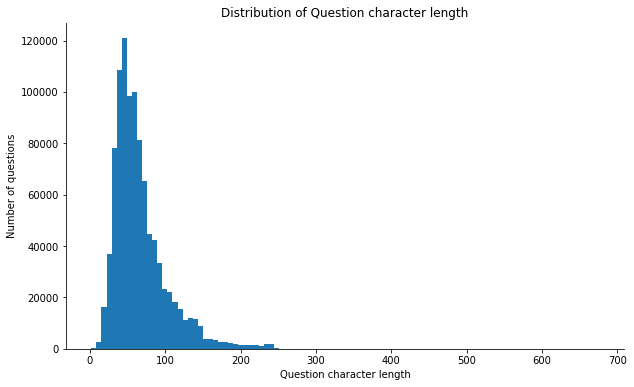

In [15]:
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in df_clean.question_text]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Question character length')
plt.ylabel('Number of questions')
plt.xlabel('Question character length')
sns.despine();

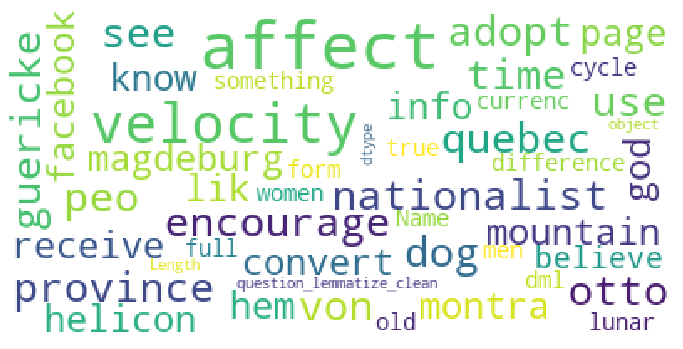

In [31]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_clean['question_lemmatize_clean']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

In [ ]:
df_clean.to_csv('df_clean.csv', index=False)

In [11]:
df_clean = pd.read_csv('df_clean.csv')

In [12]:
df_clean.head()

question_text  \
0  how did quebec nationalists see their province...   
1  do you have an adopted dog how would you encou...   
2  why does velocity affect time does velocity af...   
3  how did otto von guericke used the magdeburg h...   
4  can i convert montra helicon d to a mountain b...   

                                  question_lemmatize  
0  how do quebec nationalist see -PRON- province ...  
1  do -PRON- have an adopt dog how would -PRON- e...  
2  why do velocity affect time do velocity affect...  
3  how do otto von guericke use the magdeburg hem...  
4  can i convert montra helicon d to a mountain b...

In [13]:
df_clean['question_lemmatize_clean'] = df_clean['question_lemmatize'].str.replace('-PRON-', '')

In [14]:
df_clean

question_text  \
0       how did quebec nationalists see their province...   
1       do you have an adopted dog how would you encou...   
2       why does velocity affect time does velocity af...   
3       how did otto von guericke used the magdeburg h...   
4       can i convert montra helicon d to a mountain b...   
...                                                   ...   
983796  what info does a facebook page receive when yo...   
983797  if no can know god why believe in something yo...   
983798  is it true that the lunar cycle affects womens...   
983799  what is the difference between the old currenc...   
983800                       what is the full form of dml   

                                       question_lemmatize  \
0       how do quebec nationalist see -PRON- province ...   
1       do -PRON- have an adopt dog how would -PRON- e...   
2       why do velocity affect time do velocity affect...   
3       how do otto von guericke use the magdeburg hem...   
4       can i convert montra helicon d to a mountain b...   
...                                                   ...   
983796  what info do a facebook page receive when -PRO...   
983797  if no can know god why believe in something -P...   
983798  be -PRON- true that the lunar cycle affect wom...   
983799  what be the difference between the old currenc...   
983800                       what be the full form of dml   

                                 question_lemmatize_clean  
0       how do quebec nationalist see  province as a n...  
1       do  have an adopt dog how would  encourage peo...  
2       why do velocity affect time do velocity affect...  
3       how do otto von guericke use the magdeburg hem...  
4       can i convert montra helicon d to a mountain b...  
...                                                   ...  
983796  what info do a facebook page receive when  lik...  
983797  if no can know god why believe in something  d...  
983798  be  true that the lunar cycle affect women men...  
983799  what be the difference between the old currenc...  
983800                       what be the full form of dml  

[983801 rows x 3 columns]

In [15]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df_clean['question_lemmatize_clean'], 30)
df2 = pd.DataFrame(common_words, columns = ['unigram' , 'count'])

In [16]:
df2

unigram  count
0         good  78246
1         like  36334
2          use  35968
3       people  35195
4         make  34921
5        india  23322
6         year  21890
7          way  21395
8         time  20858
9         work  20834
10        know  20340
11       think  20309
12        life  17881
13        want  16516
14       start  14901
15       thing  14655
16         job  14603
17        feel  14083
18      happen  14067
19     country  13229
20        book  13143
21      person  12928
22       learn  12845
23        mean  12775
24     student  12568
25        need  12526
26         say  12189
27       world  11900
28  difference  11802
29         day  11692

In [17]:
fig = go.Figure([go.Bar(x=df2['unigram'], y=df2['count'])])
fig.update_layout(title=go.layout.Title(text="Top 30 unigrams in the question text after removing stop words and lemmatization"))
fig.show()

In [18]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df_clean['question_lemmatize_clean'], 20)
df3 = pd.DataFrame(common_words, columns = ['bigram' , 'count'])

In [19]:
df3

bigram  count
0               good way   7339
1               year old   4243
2           united state   2516
3              look like   2486
4              feel like   2414
5            high school   2257
6       computer science   2104
7              good book   1942
8             good place   1872
9           donald trump   1676
10              jee main   1585
11         social medium   1526
12            make money   1398
13           good friend   1287
14           north korea   1267
15            good thing   1222
16  major accomplishment   1177
17          people think   1072
18              good bad   1047
19              new york    993

In [11]:
fig = go.Figure([go.Bar(x=df3['bigram'], y=df3['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 bigrams in the question text after removing stop words and lemmatization"))
fig.show()

In [12]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df_clean['question_lemmatize_clean'], 20)
df4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

In [13]:
df4

trigram  count
0                useful tip start    578
1                  tip start work    577
2                  good way learn    418
3            good hotel shortterm    417
4        hotel shortterm business    417
5     shortterm business traveler    417
6           good bad neighborhood    407
7   consideration write biography    302
8                   year old girl    284
9                   good way make    271
10               lesser know fact    248
11            literary device use    247
12            high school student    236
13                  new york city    232
14                   year old boy    211
15      good student organization    200
16                  rank jee main    194
17             good thing weekend    188
18                  mark jee main    185
19                 good book read    183

In [14]:
fig = go.Figure([go.Bar(x=df4['trigram'], y=df4['count'])])
fig.update_layout(title=go.layout.Title(text="Top 20 trigrams in the question text"))
fig.show()

Observations: 

* A lot of questions are asking "the useful tips to start .. (I assume start something new)?"
* A lot of questions are about good way to learn something.
* A lot of questions asking recommendations of short term hotels for business travelers. 
* Many people ask about good or bad neighborhood. Assuming they want to move to a new location?
* Many people consider to write biography ... 

In [8]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=3,                        # minimum required occurences of a word 
                             stop_words='english',             # remove stop words
                             lowercase=True,                   # convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',  # num chars > 3
                             max_features=5000,             # max number of unique words. Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus
                            )

data_vectorized = vectorizer.fit_transform(df_clean['question_lemmatize_clean'])

lda_model = LatentDirichletAllocation(n_components=20, # Number of topics
                                      learning_method='online',
                                      random_state=0,       
                                      n_jobs = -1  # Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)

In [9]:
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

/opt/tljh/user/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=                x           y  topics  cluster      Freq
topic                                                   
17      18.043001  -30.814137       1        1  5.780909
7     -155.770142  -15.920777       2        1  5.771117
18       1.979983  -89.214142       3        1  5.638296
3       -3.430248  145.424713       4        1  5.502434
4       36.736946 -145.171631       5        1  5.449488
6      -88.945320   -5.583407       6        1  5.333214
11      76.205238  -80.060654       7        1  5.268965
10     111.867836   51.936783       8        1  5.139769
8      -68.663879   54.970573       9        1  5.049565
13     -48.472923  -52.271061      10        1  4.976895
1      -23.785570   11.081546      11        1  4.794398
12      -9.951418   78.718185      12        1  4.781029
2       62.825485  106.513214      13        1  4.780497
19    -113.551170  -80.366493      14        1  4.779620
5      -79.852669  122.551521      15        1  4.667623
16     136.588562  -31.026659      16        1  4.667510
0       36.109749   39.033894      17        1  4.649636
9       74.319649   -8.573841      18        1  4.571712
15    -137.150131   61.455399      19        1  4.406150
14     -56.050793 -129.614273      20        1  3.991173, topic_info=     Category          Freq         Term         Total  loglift  logprob
1887  Default  76603.000000         good  76603.000000  30.0000  30.0000
3242  Default  35107.000000       people  35107.000000  29.0000  29.0000
2671  Default  34723.000000         make  34723.000000  28.0000  28.0000
4742  Default  34785.000000          use  34785.000000  27.0000  27.0000
2572  Default  36017.000000         like  36017.000000  26.0000  26.0000
...       ...           ...          ...           ...      ...      ...
4457  Topic20   1531.863760    technique   1532.811476   3.2205  -4.7628
4470  Topic20   1475.730926  temperature   1476.678641   3.2204  -4.8001
650   Topic20   1435.752952       camera   1436.700668   3.2204  -4.8276
3333  Topic20   1424.277904     platform   1425.225619   3.2204  -4.8356
2446  Topic20   1394.762534          key   1395.710249   3.2204  -4.8566

[637 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
5         9  0.999653     able
24        2  0.999747   accept
35       18  0.999909  account
43       14  0.999678  achieve
51       15  0.999719      act
...     ...       ...      ...
4971      8  0.999928    write
4974      2  0.999810    wrong
4980     16  0.999968     year
4990     10  0.999577    young
4992     11  0.999807  youtube

[607 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 8, 19, 4, 5, 7, 12, 11, 9, 14, 2, 13, 3, 20, 6, 17, 1, 10, 16, 15])

In [10]:
# Show top 20 keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

Word 0      Word 1     Word 2       Word 3       Word 4    Word 5  \
Topic 0      know        need        say       really     american       car   
Topic 1     start      school       live     business        money     movie   
Topic 2      life       trump       type         game      english    career   
Topic 3     state         man      woman        right       course     child   
Topic 4      want      happen        new     possible       friend      tell   
Topic 5     india        high       exam          law     engineer   process   
Topic 6      make        work        day        cause   experience      kind   
Topic 7      good     college       long      service        phone      food   
Topic 8   company        help       look        human          pay      play   
Topic 9    person  difference      class      account         form      bank   
Topic 10     good        book       mean       indian        write  question   
Topic 11     like       think       come          war         free    future   
Topic 12      way        good       girl          bad          ask   example   
Topic 13   people       thing       feel         love         like    create   
Topic 14     word        test       body  application       energy   machine   
Topic 15      old    consider       lose        build        today   current   
Topic 16     year        just     change      require       normal      post   
Topic 17  country     student      world          buy       online   science   
Topic 18      use        time  different   university  engineering    number   
Topic 19      job       learn      study        quora         stop    answer   

                Word 6    Word 7     Word 8    Word 9    Word 10    Word 11  \
Topic 0         reason      talk      story   control   favorite        add   
Topic 1        website    travel   facebook      plan      level       kill   
Topic 2           true       die    medical     share       hair     animal   
Topic 3           read    social      video       win      major     design   
Topic 4          month     leave       idea       age       join    product   
Topic 5        benefit   history    develop   america      exist        act   
Topic 6       increase       tip      force     offer       turn       grow   
Topic 7            sex     power       mark      hard      score       date   
Topic 8            guy     water  important      main     market       rank   
Topic 9          order   compare        lot    weight   complete     expect   
Topic 10         place       big        app   problem        try       home   
Topic 11        family      time     effect      face      house        usa   
Topic 12    government      term    believe   support       area  president   
Topic 13  relationship     china      great    parent      allow      break   
Topic 14          away  economic     method    theory        art     factor   
Topic 15         earth     white       safe      wear  marketing      visit   
Topic 16          send  function        air      rate      sleep      large   
Topic 17      computer       eat      apply    degree    program       card   
Topic 18      language      real    prepare  software     affect        end   
Topic 19        google   improve     common      view      worth      dream   

            Word 12   Word 13     Word 14   Word 15      Word 16      Word 17  \
Topic 0        pain     marry       south     short     religion        train   
Topic 1         kid   android      public   youtube         mind          let   
Topic 2        meet     speak        fast    single        teach       source   
Topic 3       watch    medium       field   average        treat  development   
Topic 4       point      city       black     light      chinese         stay   
Topic 5       fight  industry  understand     speed     graduate      physics   
Topic 6       price    better        visa   quality  information        event   
Topic 7       datum   

In [12]:
df_topic_keywords

Word 0      Word 1     Word 2       Word 3       Word 4    Word 5  \
Topic 0      know        need        say       really     american       car   
Topic 1     start      school       live     business        money     movie   
Topic 2      life       trump       type         game      english    career   
Topic 3     state         man      woman        right       course     child   
Topic 4      want      happen        new     possible       friend      tell   
Topic 5     india        high       exam          law     engineer   process   
Topic 6      make        work        day        cause   experience      kind   
Topic 7      good     college       long      service        phone      food   
Topic 8   company        help       look        human          pay      play   
Topic 9    person  difference      class      account         form      bank   
Topic 10     good        book       mean       indian        write  question   
Topic 11     like       think       come          war         free    future   
Topic 12      way        good       girl          bad          ask   example   
Topic 13   people       thing       feel         love         like    create   
Topic 14     word        test       body  application       energy   machine   
Topic 15      old    consider       lose        build        today   current   
Topic 16     year        just     change      require       normal      post   
Topic 17  country     student      world          buy       online   science   
Topic 18      use        time  different   university  engineering    number   
Topic 19      job       learn      study        quora         stop    answer   

                Word 6    Word 7     Word 8    Word 9    Word 10    Word 11  \
Topic 0         reason      talk      story   control   favorite        add   
Topic 1        website    travel   facebook      plan      level       kill   
Topic 2           true       die    medical     share       hair     animal   
Topic 3           read    social      video       win      major     design   
Topic 4          month     leave       idea       age       join    product   
Topic 5        benefit   history    develop   america      exist        act   
Topic 6       increase       tip      force     offer       turn       grow   
Topic 7            sex     power       mark      hard      score       date   
Topic 8            guy     water  important      main     market       rank   
Topic 9          order   compare        lot    weight   complete     expect   
Topic 10         place       big        app   problem        try       home   
Topic 11        family      time     effect      face      house        usa   
Topic 12    government      term    believe   support       area  president   
Topic 13  relationship     china      great    parent      allow      break   
Topic 14          away  economic     method    theory        art     factor   
Topic 15         earth     white       safe      wear  marketing      visit   
Topic 16          send  function        air      rate      sleep      large   
Topic 17      computer       eat      apply    degree    program       card   
Topic 18      language      real    prepare  software     affect        end   
Topic 19        google   improve     common      view      worth      dream   

            Word 12   Word 13     Word 14   Word 15      Word 16      Word 17  \
Topic 0        pain     marry       south     short     religion        train   
Topic 1         kid   android      public   youtube         mind          let   
Topic 2        meet     speak        fast    single        teach       source   
Topic 3       watch    medium       field   average        treat  development   
Topic 4       point      city       black     light      chinese         stay   
Topic 5       fight  industry  understand     speed     graduate      physics   
Topic 6       price    better        visa   quality  information        event   
Topic 7       datum   

In [13]:
Topics_theme = ['American/Car/Marriage/Story/Life in general', 'Education/Business/Money', 'American Medicare/Trump', 'State/Social/Rights', 
                'Build new life', 'Highly educated Indian engineers in America', 'Tips on improving work day efficiency', 'College/Service/Power', 
                'Company/Human/Invest', 'Bank account/Charge', 'Book/Indian/App/Technology', 'War/Future/Family/USA/Race/Political', 
                'Government/President/Society', 'Relationship/China/Parent/Japan', 'Application/Energy/Machine/Economic/Art/Europe', 'Earth/Marketing/Culture', 
               'Air/Rate/Sleep/Blood/Email', 'Student/Internet/Computer/Science/Research', 'University/Engineering/Language/Software', 
                'Job/Learn/Skill improvement']
df_topic_keywords['topic_theme'] = Topics_theme

In [15]:
df_topic_keywords

Word 0      Word 1     Word 2       Word 3       Word 4    Word 5  \
Topic 0      know        need        say       really     american       car   
Topic 1     start      school       live     business        money     movie   
Topic 2      life       trump       type         game      english    career   
Topic 3     state         man      woman        right       course     child   
Topic 4      want      happen        new     possible       friend      tell   
Topic 5     india        high       exam          law     engineer   process   
Topic 6      make        work        day        cause   experience      kind   
Topic 7      good     college       long      service        phone      food   
Topic 8   company        help       look        human          pay      play   
Topic 9    person  difference      class      account         form      bank   
Topic 10     good        book       mean       indian        write  question   
Topic 11     like       think       come          war         free    future   
Topic 12      way        good       girl          bad          ask   example   
Topic 13   people       thing       feel         love         like    create   
Topic 14     word        test       body  application       energy   machine   
Topic 15      old    consider       lose        build        today   current   
Topic 16     year        just     change      require       normal      post   
Topic 17  country     student      world          buy       online   science   
Topic 18      use        time  different   university  engineering    number   
Topic 19      job       learn      study        quora         stop    answer   

                Word 6    Word 7     Word 8    Word 9  ...    Word 11  \
Topic 0         reason      talk      story   control  ...        add   
Topic 1        website    travel   facebook      plan  ...       kill   
Topic 2           true       die    medical     share  ...     animal   
Topic 3           read    social      video       win  ...     design   
Topic 4          month     leave       idea       age  ...    product   
Topic 5        benefit   history    develop   america  ...        act   
Topic 6       increase       tip      force     offer  ...       grow   
Topic 7            sex     power       mark      hard  ...       date   
Topic 8            guy     water  important      main  ...       rank   
Topic 9          order   compare        lot    weight  ...     expect   
Topic 10         place       big        app   problem  ...       home   
Topic 11        family      time     effect      face  ...        usa   
Topic 12    government      term    believe   support  ...  president   
Topic 13  relationship     china      great    parent  ...      break   
Topic 14          away  economic     method    theory  ...     factor   
Topic 15         earth     white       safe      wear  ...      visit   
Topic 16          send  function        air      rate  ...      large   
Topic 17      computer       eat      apply    degree  ...       card   
Topic 18      language      real    prepare  software  ...        end   
Topic 19        google   improve     common      view  ...      dream   

            Word 12   Word 13     Word 14   Word 15      Word 16      Word 17  \
Topic 0        pain     marry       south     short     religion        train   
Topic 1         kid   android      public   youtube         mind          let   
Topic 2        meet     speak        fast    single        teach       source   
Topic 3       watch    medium       field   average        treat  development   
Topic 4       point      city       black     light      chinese         stay   
Topic 5       fight  industry  understand     speed     graduate      physics   
Topic 6       price    better        visa   quality  information        event   
Topic 7       datum       jee        site      deal       chance        wrong   
Topic 8        able     small      option      earn       invest   

In [16]:
df_topic_keywords.set_index('topic_theme', inplace=True)

In [20]:
df_topic_keywords.T

topic_theme American/Car/Marriage/Story/Life in general  \
Word 0                                             know   
Word 1                                             need   
Word 2                                              say   
Word 3                                           really   
Word 4                                         american   
Word 5                                              car   
Word 6                                           reason   
Word 7                                             talk   
Word 8                                            story   
Word 9                                          control   
Word 10                                        favorite   
Word 11                                             add   
Word 12                                            pain   
Word 13                                           marry   
Word 14                                           south   
Word 15                                           short   
Word 16                                        religion   
Word 17                                           train   
Word 18                                         thought   
Word 19                                      depression   

topic_theme Education/Business/Money American Medicare/Trump  \
Word 0                         start                    life   
Word 1                        school                   trump   
Word 2                          live                    type   
Word 3                      business                    game   
Word 4                         money                 english   
Word 5                         movie                  career   
Word 6                       website                    true   
Word 7                        travel                     die   
Word 8                      facebook                 medical   
Word 9                          plan                   share   
Word 10                        level                    hair   
Word 11                         kill                  animal   
Word 12                          kid                    meet   
Word 13                      android                   speak   
Word 14                       public                    fast   
Word 15                      youtube                  single   
Word 16                         mind                   teach   
Word 17                          let                  source   
Word 18                   girlfriend                personal   
Word 19                      teacher               recommend   

topic_theme State/Social/Rights Build new life  \
Word 0                    state           want   
Word 1                      man         happen   
Word 2                    woman            new   
Word 3                    right       possible   
Word 4                   course         friend   
Word 5                    child           tell   
Word 6                     read          month   
Word 7                   social          leave   
Word 8                    video           idea   
Word 9                      win            age   
Word 10                   major           join   
Word 11                  design        product   
Word 12                   watch          point   
Word 13                  medium           city   
Word 14                   field          black   
Word 15                 average          light   
Word 16                   treat        chinese   
Word 17             development           stay   
Word 18                  united           math   
Word 19           international         salary   

topic_theme Highly educated Indian engineers in America  \
Word 0                                            india   
Word 1                                             high   
Word 2                                             exam   
Word 3                                              law   
Word 4                                         engineer   
Word 5    

In [11]:
df_topic_keywords.T

Topic 0     Topic 1    Topic 2        Topic 3   Topic 4  \
Word 0         know       start       life          state      want   
Word 1         need      school      trump            man    happen   
Word 2          say        live       type          woman       new   
Word 3       really    business       game          right  possible   
Word 4     american       money    english         course    friend   
Word 5          car       movie     career          child      tell   
Word 6       reason     website       true           read     month   
Word 7         talk      travel        die         social     leave   
Word 8        story    facebook    medical          video      idea   
Word 9      control        plan      share            win       age   
Word 10    favorite       level       hair          major      join   
Word 11         add        kill     animal         design   product   
Word 12        pain         kid       meet          watch     point   
Word 13       marry     android      speak         medium      city   
Word 14       south      public       fast          field     black   
Word 15       short     youtube     single        average     light   
Word 16    religion        mind      teach          treat   chinese   
Word 17       train         let     source    development      stay   
Word 18     thought  girlfriend   personal         united      math   
Word 19  depression     teacher  recommend  international    salary   

            Topic 5      Topic 6  Topic 7    Topic 8     Topic 9    Topic 10  \
Word 0        india         make     good    company      person        good   
Word 1         high         work  college       help  difference        book   
Word 2         exam          day     long       look       class        mean   
Word 3          law        cause  service      human     account      indian   
Word 4     engineer   experience    phone        pay        form       write   
Word 5      process         kind     food       play        bank    question   
Word 6      benefit     increase      sex        guy       order       place   
Word 7      history          tip    power      water     compare         big   
Word 8      develop        force     mark  important         lot         app   
Word 9      america        offer     hard       main      weight     problem   
Word 10       exist         turn    score     market    complete         try   
Word 11         act         grow     date       rank      expect        home   
Word 12       fight        price    datum       able      charge        cost   
Word 13    industry       better      jee      small        fact      choose   
Word 14  understand         visa     site     option      mobile         run   
Word 15       speed      quality     deal       earn      period         dog   
Word 16    graduate  information   chance     invest      second         low   
Word 17     physics        event    wrong     master      advice  technology   
Word 18        code         mass   follow    subject        past         iit   
Word 19   advantage       amazon  provide       role      laptop    actually   

          Topic 11    Topic 12      Topic 13     Topic 14   Topic 15  \
Word 0        like         way        people         word        old   
Word 1       think        good         thing         test   consider   
Word 2        come        girl          feel         body       lose   
Word 3         war         bad          love  application      build   
Word 4        free         ask          like       energy      today   
Word 5      future     example        create      machine    current   
Word 6      family  government  relationship         away      earth   
Word 7        time        term         china     economic      white   
Word 8      effect     believe         great       method       safe   
Word 9        face     support        parent       theory       wear   
Word 10      house        area         allow   

In [21]:
# Create Document - Topic Matrix
lda_output = lda_model.transform(data_vectorized)

# column names
topicnames = df_topic_keywords.T.columns
# topicnames = ["Topic" + str(i) for i in range(20)]

# index names
docnames = ["Doc" + str(i) for i in range(len(df_clean))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

In [22]:
df_document_topic

topic_theme  American/Car/Marriage/Story/Life in general  \
Doc0                                                0.01   
Doc1                                                0.01   
Doc2                                                0.01   
Doc3                                                0.03   
Doc4                                                0.01   
...                                                  ...   
Doc983796                                           0.15   
Doc983797                                           0.41   
Doc983798                                           0.15   
Doc983799                                           0.01   
Doc983800                                           0.03   

topic_theme  Education/Business/Money  American Medicare/Trump  \
Doc0                             0.01                     0.01   
Doc1                             0.01                     0.01   
Doc2                             0.01                     0.01   
Doc3                             0.03                     0.03   
Doc4                             0.01                     0.01   
...                               ...                      ...   
Doc983796                        0.44                     0.01   
Doc983797                        0.01                     0.01   
Doc983798                        0.29                     0.15   
Doc983799                        0.01                     0.34   
Doc983800                        0.03                     0.03   

topic_theme  State/Social/Rights  Build new life  \
Doc0                        0.01            0.01   
Doc1                        0.01            0.01   
Doc2                        0.01            0.01   
Doc3                        0.03            0.03   
Doc4                        0.01            0.01   
...                          ...             ...   
Doc983796                   0.01            0.01   
Doc983797                   0.01            0.01   
Doc983798                   0.01            0.01   
Doc983799                   0.01            0.12   
Doc983800                   0.03            0.03   

topic_theme  Highly educated Indian engineers in America  \
Doc0                                                0.01   
Doc1                                                0.01   
Doc2                                                0.01   
Doc3                                                0.03   
Doc4                                                0.01   
...                                                  ...   
Doc983796                                           0.01   
Doc983797                                           0.01   
Doc983798                                           0.01   
Doc983799                                           0.01   
Doc983800                                           0.03   

topic_theme  Tips on improving work day efficiency  College/Service/Power  \
Doc0                                          0.01                   0.01   
Doc1                                          0.01                   0.01   
Doc2                                          0.01                   0.01   
Doc3                                          0.03                   0.03   
Doc4                                          0.01                   0.01   
...                                            ...                    ...   
Doc983796                                     0.01                   0.15   
Doc983797                                     0.01                   0.01   
Doc983798                                     0.01                   0.01   
Doc983799                                     0.01                   0.01   
Doc983800                                     0.03                   0.03   

topic_theme  Company/Human/Invest  Bank account/Charge  ...  \
Doc0                         0.01                 0.01  ...   
Doc1                         0.01                 0.01  ...   
Doc2                      

In [23]:
df_document_topic.reset_index(inplace=True)
df_sent_topic= pd.merge(df_clean, df_document_topic, left_index=True, right_index=True)
df_sent_topic.drop('index', axis=1, inplace=True)

In [24]:
df_sent_topic

question_text  \
0       how did quebec nationalists see their province...   
1       do you have an adopted dog how would you encou...   
2       why does velocity affect time does velocity af...   
3       how did otto von guericke used the magdeburg h...   
4       can i convert montra helicon d to a mountain b...   
...                                                   ...   
983796  what info does a facebook page receive when yo...   
983797  if no can know god why believe in something yo...   
983798  is it true that the lunar cycle affects womens...   
983799  what is the difference between the old currenc...   
983800                       what is the full form of dml   

                                       question_lemmatize  \
0       how do quebec nationalist see -PRON- province ...   
1       do -PRON- have an adopt dog how would -PRON- e...   
2       why do velocity affect time do velocity affect...   
3       how do otto von guericke use the magdeburg hem...   
4       can i convert montra helicon d to a mountain b...   
...                                                   ...   
983796  what info do a facebook page receive when -PRO...   
983797  if no can know god why believe in something -P...   
983798  be -PRON- true that the lunar cycle affect wom...   
983799  what be the difference between the old currenc...   
983800                       what be the full form of dml   

                                 question_lemmatize_clean  \
0       how do quebec nationalist see  province as a n...   
1       do  have an adopt dog how would  encourage peo...   
2       why do velocity affect time do velocity affect...   
3       how do otto von guericke use the magdeburg hem...   
4       can i convert montra helicon d to a mountain b...   
...                                                   ...   
983796  what info do a facebook page receive when  lik...   
983797  if no can know god why believe in something  d...   
983798  be  true that the lunar cycle affect women men...   
983799  what be the difference between the old currenc...   
983800                       what be the full form of dml   

        American/Car/Marriage/Story/Life in general  Education/Business/Money  \
0                                              0.01                      0.01   
1                                              0.01                      0.01   
2                                              0.01                      0.01   
3                                              0.03                      0.03   
4                                              0.01                      0.01   
...                                             ...                       ...   
983796                                         0.15                      0.44   
983797                                         0.41                      0.01   
983798                                         0.15                      0.29   
983799                                         0.01                      0.01   
983800                                         0.03                      0.03   

        American Medicare/Trump  State/Social/Rights  Build new life  \
0                          0.01                 0.01            0.01   
1                          0.01                 0.01            0.01   
2                          0.01                 0.01            0.01   
3                          0.03                 0.03            0.03   
4                          0.01                 0.01            0.01   
...                         ...                  ...             ...   
983796                     0.01                 0.01            0.01   
983797                     0.01                 0.01            0.01   
983798                     0.15                 0.01            0.01   
983799                     0.34                 0.01            0.12   
983800                     0.03                 0.03            0.03   

       

In [26]:
df_topic_theme = df_sent_topic[['question_text', 'dominant_topic']]

In [27]:
df_topic_theme.head(10)

question_text  dominant_topic
0  how did quebec nationalists see their province...              11
1  do you have an adopted dog how would you encou...              10
2  why does velocity affect time does velocity af...              18
3  how did otto von guericke used the magdeburg h...              18
4  can i convert montra helicon d to a mountain b...              16
5  is gaza slowly becoming auschwitz dachau or tr...              13
6  why does quora automatically ban conservative ...              19
7  is it crazy if i wash or wipe my groceries off...               5
8  is there such a thing as dressing moderately a...              18
9  is it just me or have you ever been in this ph...              13

In [28]:
def label_theme(row):
    if row['dominant_topic'] == 0 :
        return 'American/Car/Marriage/Story/Life in general'
    if row['dominant_topic'] == 1 :
        return 'Education/Business/Money'
    if row['dominant_topic'] == 2 :
        return 'American Medicare/Trump'
    if row['dominant_topic'] == 3:
        return 'State/Social/Rights'
    if row['dominant_topic']  == 4:
        return 'Build new life'
    if row['dominant_topic'] == 5:
        return 'Highly educated Indian engineers in America'
    if row['dominant_topic'] == 6:
        return 'Tips on improving work day efficiency'
    if row['dominant_topic'] == 7:
        return 'College/Service/Power'
    if row['dominant_topic'] == 8:
        return 'Company/Human/Invest'
    if row['dominant_topic'] == 9:
        return 'Bank account/Charge'
    if row['dominant_topic'] == 10:
        return 'Book/Indian/App/Technology'
    if row['dominant_topic'] == 11:
        return 'War/Future/Family/USA/Race/Political'
    if row['dominant_topic'] == 12:
        return 'Government/President/Society'
    if row['dominant_topic'] == 13:
        return 'Relationship/China/Parent/Japan'
    if row['dominant_topic'] == 14:
        return 'Application/Energy/Machine/Economic/Art/Europe'
    if row['dominant_topic'] == 15:
        return 'Earth/Marketing/Culture'
    if row['dominant_topic'] == 16:
        return 'Air/Rate/Sleep/Blood/Email'
    if row['dominant_topic'] == 17:
        return 'Student/Internet/Computer/Science/Research'
    if row['dominant_topic'] == 18:
        return 'University/Engineering/Language/Software'
    if row['dominant_topic'] == 19:
        return 'Job/Learn/Skill improvement'

In [29]:
df_topic_theme['dominant_topic_theme'] = df_topic_theme.apply (lambda row: label_theme(row), axis=1)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
df_topic_theme.head(15)

question_text  dominant_topic  \
0   how did quebec nationalists see their province...              11   
1   do you have an adopted dog how would you encou...              10   
2   why does velocity affect time does velocity af...              18   
3   how did otto von guericke used the magdeburg h...              18   
4   can i convert montra helicon d to a mountain b...              16   
5   is gaza slowly becoming auschwitz dachau or tr...              13   
6   why does quora automatically ban conservative ...              19   
7   is it crazy if i wash or wipe my groceries off...               5   
8   is there such a thing as dressing moderately a...              18   
9   is it just me or have you ever been in this ph...              13   
10                    what can you say about feminism               0   
11                how were the calgary flames founded               5   
12  what is the dumbest yet possibly true explanat...               2   
13  can we use our external hard disk as a os as w...               7   
14  i am  living at home and have no boyfriend i w...              10   

                           dominant_topic_theme  
0          War/Future/Family/USA/Race/Political  
1                    Book/Indian/App/Technology  
2      University/Engineering/Language/Software  
3      University/Engineering/Language/Software  
4                    Air/Rate/Sleep/Blood/Email  
5               Relationship/China/Parent/Japan  
6                   Job/Learn/Skill improvement  
7   Highly educated Indian engineers in America  
8      University/Engineering/Language/Software  
9               Relationship/China/Parent/Japan  
10  American/Car/Marriage/Story/Life in general  
11  Highly educated Indian engineers in America  
12                      American Medicare/Trump  
13                        College/Service/Power  
14                   Book/Indian/App/Technology

In [31]:
df.question_text[2]

'Why does velocity affect time? Does velocity affect space geometry?'

In [32]:
df.question_text[3]

'How did Otto von Guericke used the Magdeburg hemispheres?'

In [33]:
df.question_text[8]

'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?'

In [35]:
df_topic_keywords.T['University/Engineering/Language/Software']

Word 0             use
Word 1            time
Word 2       different
Word 3      university
Word 4     engineering
Word 5          number
Word 6        language
Word 7            real
Word 8         prepare
Word 9        software
Word 10         affect
Word 11            end
Word 12           sell
Word 13           open
Word 14           base
Word 15            god
Word 16        instead
Word 17            cat
Word 18          delhi
Word 19      character
Name: University/Engineering/Language/Software, dtype: object

In [40]:
df_topic_theme.groupby(['dominant_topic', 'dominant_topic_theme']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset='dominant_topic_theme')

dominant_topic                            dominant_topic_theme   count
0                0     American/Car/Marriage/Story/Life in general  111552
1                1                        Education/Business/Money   90896
2                3                             State/Social/Rights   85122
3                2                         American Medicare/Trump   81585
4                4                                  Build new life   73657
5                7                           College/Service/Power   62617
6                6           Tips on improving work day efficiency   59410
7                5     Highly educated Indian engineers in America   55874
8               10                      Book/Indian/App/Technology   43228
9                8                            Company/Human/Invest   43008
10              11            War/Future/Family/USA/Race/Political   38765
11               9                             Bank account/Charge   36045
12              12                    Government/President/Society   34219
13              13                 Relationship/China/Parent/Japan   31532
14              17      Student/Internet/Computer/Science/Research   30303
15              18        University/Engineering/Language/Software   27663
16              15                         Earth/Marketing/Culture   20226
17              14  Application/Energy/Machine/Economic/Art/Europe   20140
18              16                      Air/Rate/Sleep/Blood/Email   19711
19              19                     Job/Learn/Skill improvement   18248

In [41]:
df_topic_distribution = df_topic_theme.groupby(['dominant_topic', 'dominant_topic_theme']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset='dominant_topic_theme')

In [42]:
df_topic_distribution

dominant_topic                            dominant_topic_theme   count
0                0     American/Car/Marriage/Story/Life in general  111552
1                1                        Education/Business/Money   90896
2                3                             State/Social/Rights   85122
3                2                         American Medicare/Trump   81585
4                4                                  Build new life   73657
5                7                           College/Service/Power   62617
6                6           Tips on improving work day efficiency   59410
7                5     Highly educated Indian engineers in America   55874
8               10                      Book/Indian/App/Technology   43228
9                8                            Company/Human/Invest   43008
10              11            War/Future/Family/USA/Race/Political   38765
11               9                             Bank account/Charge   36045
12              12                    Government/President/Society   34219
13              13                 Relationship/China/Parent/Japan   31532
14              17      Student/Internet/Computer/Science/Research   30303
15              18        University/Engineering/Language/Software   27663
16              15                         Earth/Marketing/Culture   20226
17              14  Application/Energy/Machine/Economic/Art/Europe   20140
18              16                      Air/Rate/Sleep/Blood/Email   19711
19              19                     Job/Learn/Skill improvement   18248

Predict the topics for a new question.

In [44]:
# Tokenize and Clean-up using gensim’s simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
# Lemmatization, remove pronouns.
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

In [49]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# We will not assign dependency labels, and we will not lable named entities. And we need pos. 
nlp = spacy.load('en', disable=['parser', 'ner'])

# Define function to predict topic for a given new question.
def predict_topic(text, nlp=nlp):
    global sent_to_words
    global lemmatization

    # Step 1: Clean with simple_preprocess
    mytext_2 = list(sent_to_words(text))

    # Step 2: Lemmatize
    mytext_3 = lemmatization(mytext_2, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

    # Step 3: Vectorize transform
    mytext_4 = vectorizer.transform(mytext_3)

    # Step 4: LDA Transform
    topic_probability_scores = lda_model.transform(mytext_4)
    topic = df_topic_keywords.iloc[np.argmax(topic_probability_scores), :].values.tolist()
    return topic, topic_probability_scores

# Predict the topic
mytext = ["What are the most important lessons you have learned in your life and when did you learn them?"]
topic, prob_scores = predict_topic(text = mytext)
print(topic)

['job', 'learn', 'study', 'quora', 'stop', 'answer', 'google', 'improve', 'common', 'view', 'worth', 'dream', 'skill', 'mba', 'stock', 'legal', 'opinion', 'military', 'close', 'startup']


In [50]:
topic, prob_scores

(['job',
  'learn',
  'study',
  'quora',
  'stop',
  'answer',
  'google',
  'improve',
  'common',
  'view',
  'worth',
  'dream',
  'skill',
  'mba',
  'stock',
  'legal',
  'opinion',
  'military',
  'close',
  'startup'],
 array([[0.00833333, 0.00833333, 0.175     , 0.00833333, 0.00833333,
         0.00833333, 0.00833333, 0.00833333, 0.175     , 0.175     ,
         0.00833333, 0.00833333, 0.00833333, 0.00833333, 0.00833333,
         0.00833333, 0.00833333, 0.00833333, 0.00833333, 0.34166667]]))

In [ ]:
df_topic_keywords.T['Student/Internet/Computer/Science/Research']

In [51]:
df_topic_keywords.T['Job/Learn/Skill improvement']

Word 0          job
Word 1        learn
Word 2        study
Word 3        quora
Word 4         stop
Word 5       answer
Word 6       google
Word 7      improve
Word 8       common
Word 9         view
Word 10       worth
Word 11       dream
Word 12       skill
Word 13         mba
Word 14       stock
Word 15       legal
Word 16     opinion
Word 17    military
Word 18       close
Word 19     startup
Name: Job/Learn/Skill improvement, dtype: object

In [54]:
df_topic_theme.head()

question_text  dominant_topic  \
0  how did quebec nationalists see their province...              11   
1  do you have an adopted dog how would you encou...              10   
2  why does velocity affect time does velocity af...              18   
3  how did otto von guericke used the magdeburg h...              18   
4  can i convert montra helicon d to a mountain b...              16   

                       dominant_topic_theme  
0      War/Future/Family/USA/Race/Political  
1                Book/Indian/App/Technology  
2  University/Engineering/Language/Software  
3  University/Engineering/Language/Software  
4                Air/Rate/Sleep/Blood/Email